In [1]:
%pylab inline

from __future__ import division

import os

import numpy as np
import tables

Populating the interactive namespace from numpy and matplotlib


# Select an experiment and load it

This will iterate over all experiments in the ```output/``` directory and select the most recent one that matches the pattern. 

In [2]:
pattern = "bsc"

matching_experiments = [dirname for dirname in os.listdir("output") if pattern in dirname]
selected_experiment = matching_experiments[-1]
print("Found %d experiments matching pattern; loading last one: '%s'" % (len(matching_experiments), selected_experiment))

with tables.open_file(os.path.join("output", selected_experiment, "result.h5")) as h5:
    pi = h5.root.pi[:]
    sigma = h5.root.sigma[:]
    W = h5.root.W[:]
    
# Assert no, of iterations is the same for all parameters
n_iter = pi.shape[0]
assert n_iter == sigma.shape[0]
assert n_iter == W.shape[0]

print("Loaded parameters from %d EM iterations..." % n_iter)

Found 4 experiments matching pattern; loading last one: 'param-bars-bsc.py.2016-08-11+14:22'
Loaded parameters from 50 EM iterations...


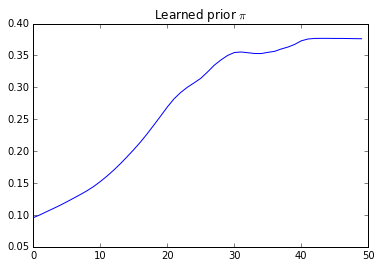

In [3]:
title("Learned prior $\pi$"); 
plot(pi)

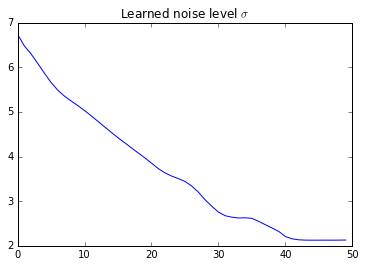

In [4]:
title("Learned noise level $\sigma$");
plot(sigma)

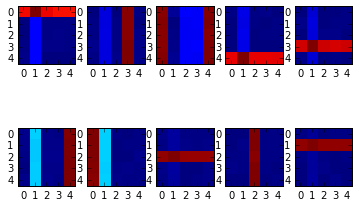

In [6]:
D, H = W[-1, : :].shape
for h in xrange(H):
    subplot(2, 5, h+1)
    #axes{'off'}
    imshow(W[-1, :, h].reshape(5, 5), interpolation='nearest')